In [1]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai


In [13]:
path="data"
df = pd.read_csv("data/shuffeled.csv",comment="-");df

,detectedActivity,geoHash,minuteOfDay,weekday,journey
0,7,1242213299,1033,1,8000081216
1,7,1242479279,1151,4,8121680140
2,7,1242479403,635,6,8121690042
3,3,1242479279,564,1,8121680000
4,3,1242479403,630,6,8121690042
5,3,1242213299,998,4,8000081216
6,3,1242479403,519,3,8121680000
7,7,1242479279,514,3,8121680000
8,3,1242212679,1347,3,8014081216
9,7,1242479403,1156,6,8121680140


In [14]:
dep_var = 'journey'

cat_names = ["detectedActivity","weekday"]
cont_names =["geoHash","minuteOfDay"]
#cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
#cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [124]:
valid_idx = range(len(df)-3000, len(df)) ##Change
print(valid_idx)
   # n = len(list(open(PATH)))-1
  #  val_idxs = get_cv_idxs(n)

range(3759, 6759)


In [174]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [175]:
#test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)
#data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
#
tabularList = TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
splitList= tabularList.split_by_idx(list(valid_idx))
splitListLabel=splitList.label_from_df(cols=dep_var)
splitListLabeltest =splitListLabel.add_test(test, label=0)
data = splitListLabeltest.databunch()
# data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#                            .split_by_idx(list(range(800,1000)))
#                            .label_from_df(cols=dep_var)
#                            .add_test(test, label=0)
#                            .databunch())
#print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
#print(data.train_ds.cat_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

In [59]:
print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
print(data.train_ds.cat_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
data.show_batch(rows=10)

['geoHash', 'minuteOfDay']
['detectedActivity', 'weekday']


detectedActivity,weekday,geoHash,minuteOfDay
3,3,-0.3081,-1.3441
7,0,2.9372,0.6558
7,1,-0.3778,0.2678
3,2,-0.3082,-1.3405
3,0,2.9344,0.8004
7,1,-0.3081,-1.4181
7,0,2.9372,0.7863
7,5,-0.3082,-1.3053
7,2,-0.3778,0.3701
3,2,-0.3780,1.4352


In [178]:
learn = get_tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(3, 1e-1)

Total time: 00:02
epoch  train_loss  valid_loss  accuracy
1      0.266240    0.149787    0.925000  (00:00)
2      0.135753    0.003868    1.000000  (00:00)
3      0.105400    0.174039    0.924000  (00:00)



In [159]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[3 5]
 [1 5]
 [3 1]
 [3 7]
 [3 5]]
[[-0.308682 -1.360281]
 [-0.308682 -1.388551]
 [ 2.933779  0.703397]
 [-0.30865  -0.886766]
 [-0.378267  0.261685]]
[3 3 5 2 0]


In [51]:
learn.fit(2)

Total time: 00:01
epoch  train_loss  valid_loss  accuracy
1      0.013491    0.000197    1.000000  (00:00)
2      0.022343    0.000173    1.000000  (00:00)



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


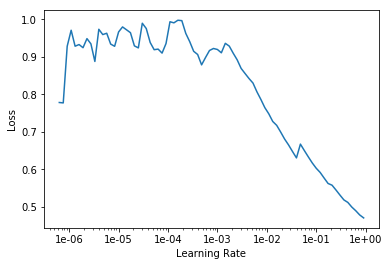

In [63]:
lr_find(learn)
learn.recorder.plot()

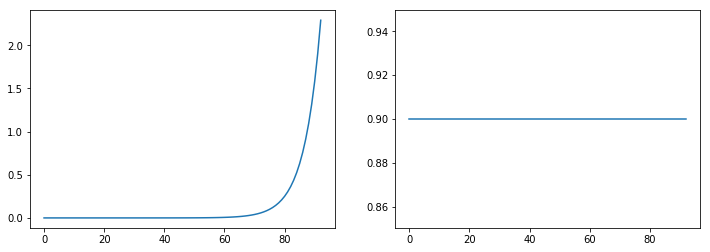

In [64]:
learn.recorder.plot_lr(show_moms=True)

In [158]:
testsetlow = len(df)-1000
randint= random.randrange(testsetlow, len(df))
#df.iloc[3]
print(learn.predict(df.iloc[randint]))
print(df.iloc[randint,4])

(8121680140, tensor(1), tensor([2.7258e-07, 1.0000e+00, 2.8394e-07, 3.3249e-08, 3.8905e-10, 5.2353e-09]))
8121680140


In [128]:
learn.predict(df.iloc[30])

(8121680140,
 tensor(1),
 tensor([3.8208e-04, 9.9961e-01, 9.0101e-06, 7.8648e-08, 3.9492e-11, 6.8287e-08]))

In [181]:
#learn.show_results(df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
learn.fit_one_cycle(1)

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      0.031901    0.003523    1.000000  (00:00)



In [10]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_names];cat_sz
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz];emb_szs

AttributeError: Can only use .cat accessor with a 'category' dtype